In [1]:
import pandas as pd
import numpy as np
from pykrx import stock
import matplotlib.pyplot as plt
import random

In [2]:
kospi_200 = stock.get_index_portfolio_deposit_file("1028")

df = pd.DataFrame(columns=['시가', '고가', '저가', '종가', '거래량', '종목명', '종목코드'])
for i in kospi_200:
    tmp_df = stock.get_market_ohlcv_by_date("20200101", "20210101", i, "y")
    name = stock.get_market_ticker_name(i)
    tmp_df['종목명'] = name
    tmp_df['종목코드'] = i
    df = df.append(tmp_df)

sorted_df = df.sort_values(by=['거래량'], axis=0, ascending = False)
code_df = sorted_df.iloc[:30, 6]

def volume_ret_df(date_1, date_2):
    code_list = []
    name_list = []
    f_list = []
    o_list = []
    p_list = []

    for i in range(len(code_df)):
        code_tmp = code_df[i]
        name_tmp = stock.get_market_ticker_name(code_tmp)
        volume_df = stock.get_market_trading_volume_by_date(date_1, date_2, code_tmp,on = '매도')
        code_list.append(code_tmp)
        name_list.append(name_tmp)
        f_list.append(volume_df['외국인합계'])
        o_list.append(volume_df['기관합계'])
        p_list.append(volume_df['개인'])

    result_df = pd.DataFrame(columns=['종목코드', '종목명', '외국인거래량', '기관거래량', '개인거래량'])
    result_df['종목코드'] = code_list
    result_df['종목명'] = name_list
    result_df['외국인거래량'] = f_list
    result_df['기관거래량'] = o_list
    result_df['개인거래량'] = p_list

    return result_df

def volume_ret_df2(date_1, date_2):
    code_list = []
    name_list = []
    f_list = []
    o_list = []
    p_list = []

    for i in range(len(code_df)):
        code_tmp = code_df[i]
        name_tmp = stock.get_market_ticker_name(code_tmp)
        volume_df = stock.get_market_trading_volume_by_date(date_1, date_2, code_tmp,on = '매수')
        code_list.append(code_tmp)
        name_list.append(name_tmp)
        f_list.append(volume_df['외국인합계'])
        o_list.append(volume_df['기관합계'])
        p_list.append(volume_df['개인'])

    result_df = pd.DataFrame(columns=['종목코드', '종목명', '외국인거래량', '기관거래량', '개인거래량'])
    result_df['종목코드'] = code_list
    result_df['종목명'] = name_list
    result_df['외국인거래량'] = f_list
    result_df['기관거래량'] = o_list
    result_df['개인거래량'] = p_list

    return result_df

a_df = volume_ret_df("20150101", "20200131")
a_df2 =  volume_ret_df2("20150101", "20200131")
print(a_df)
print(a_df2)

      종목코드      종목명                                             외국인거래량  \
0   005930     삼성전자  날짜
2015-01-02       99983
2015-01-05      1301...   
1   008350    남선알미늄  날짜
2015-01-02      41406
2015-01-05      19245...   
2   010140    삼성중공업  날짜
2015-01-02     277130
2015-01-05     350916...   
3   042670  두산인프라코어  날짜
2015-01-02     188389
2015-01-05     239633...   
4   019170     신풍제약  날짜
2015-01-02      1768
2015-01-05      3171
2...   
5   088350     한화생명  날짜
2015-01-02     262167
2015-01-05     127291...   
6   020560   아시아나항공  날짜
2015-01-02    780149
2015-01-05    492588
2...   
7   034020    두산중공업  날짜
2015-01-02     51725
2015-01-05     56675
2...   
8   003520     영진약품  날짜
2015-01-02     62414
2015-01-05     49126
2...   
9   011200      HMM  날짜
2015-01-02    126313
2015-01-05    219371
2...   
10  003000     부광약품  날짜
2015-01-02    29848
2015-01-05    45794
201...   
11  000660   SK하이닉스  날짜
2015-01-02     538274
2015-01-05     333221...   
12  015760     한국전력  날짜
2015-01-02    

<ipython-input-29-14f0f75fd171>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b_df['총외국인거래량'][i] = b_df['종가'][i]*b_df['외국인거래량'][i]
                   날짜    외국인거래량     종가       총외국인거래량
날짜                                                  
2015-01-02 2015-01-02     99983  26799    2679444417
2015-01-05 2015-01-05    130139  26720    3477314080
2015-01-06 2015-01-06    228192  26300    6001449600
2015-01-07 2015-01-07    228193  25880    5905634840
2015-01-08 2015-01-08    217463  26780    5823659140
...               ...       ...    ...           ...
2020-01-23 2020-01-23   5461159  61800  337499626200
2020-01-28 2020-01-28  11220719  59400  666510708600
2020-01-29 2020-01-29   3922955  59100  231846640500
2020-01-30 2020-01-30   7053492  58800  414745329600
2020-01-31 2020-01-31   9280651  57800  536

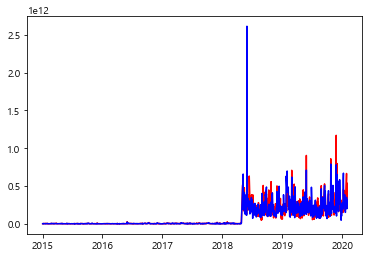

In [29]:
b_df = pd.DataFrame(columns=['날짜','외국인거래량','종가','총외국인거래량'])
b_df['외국인거래량'] = a_df['외국인거래량'][0]
b_df['종가'] = stock.get_market_ohlcv_by_date("20150101","20200131",a_df['종목코드'][0])
for i in range(len(b_df)):
    b_df['총외국인거래량'][i] = b_df['종가'][i]*b_df['외국인거래량'][i]
b_df['날짜'] = b_df.index
print(b_df)
plt.plot(b_df['날짜'], b_df['총외국인거래량'], c = 'r', label = '외국인')

b_df2 = pd.DataFrame(columns=['날짜','외국인거래량','종가','총외국인거래량'])
b_df2['외국인거래량'] = a_df2['외국인거래량'][0]
b_df2['종가'] = stock.get_market_ohlcv_by_date("20150101","20200131",a_df2['종목코드'][0])
for i in range(len(b_df2)):
    b_df2['총외국인거래량'][i] = b_df2['종가'][i]*b_df2['외국인거래량'][i]
b_df2['날짜'] = b_df2.index
print(b_df2)
plt.plot(b_df2['날짜'], b_df2['총외국인거래량'], c = 'b', label = '외국인')

                   날짜    외국인거래량     종가        총외국인거래량
날짜                                                   
2015-01-02 2015-01-02    221432  26799     5934156168
2015-01-05 2015-01-05    207230  26720     5537185600
2015-01-06 2015-01-06    354132  26300     9313671600
2015-01-07 2015-01-07    396305  25880    10256373400
2015-01-08 2015-01-08    430574  26780    11530771720
...               ...       ...    ...            ...
2020-01-23 2020-01-23   8698581  61800   537572305800
2020-01-28 2020-01-28  17140684  59400  1018156629600
2020-01-29 2020-01-29   8319631  59100   491690192100
2020-01-30 2020-01-30  10460186  58800   615058936800
2020-01-31 2020-01-31  14784587  57800   854549128600

[1244 rows x 4 columns]


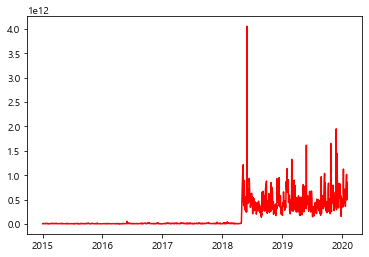

In [30]:
b_df3 = pd.DataFrame(columns=['날짜','외국인거래량','종가','총외국인거래량'])
b_df3['외국인거래량'] = b_df['외국인거래량']+b_df2['외국인거래량']
b_df3['종가'] = b_df['종가']
b_df3['총외국인거래량'] = b_df['총외국인거래량'] +b_df2['총외국인거래량'] 
b_df3['날짜'] = b_df.index
print(b_df3)
plt.plot(b_df3['날짜'], b_df3['총외국인거래량'], c = 'r', label = '외국인')

In [31]:
class Preprocessor:

    def normalize(arr):
        #     sign = np.sign(arr)
        #     arr = np.log(np.abs(arr)+1)*sign
        return (arr-np.mean(arr))/np.std(arr)
    
    def minmax(arr):
        return((arr-np.min(arr))/(np.max(arr)-np.min(arr)))

C:\Users\82102\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\82102\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82102\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


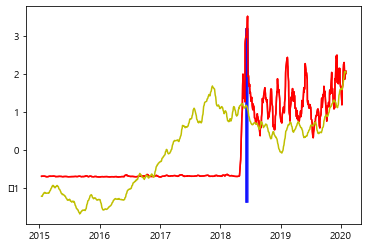

In [32]:
ppsr = Preprocessor
b_df3['10일이동평균'] = b_df3['총외국인거래량'].rolling(window=10).mean()
b_df3['정규화'] = ppsr.normalize(b_df3['10일이동평균'])
plt.plot(b_df3.index, b_df3['정규화'], c = 'r', label = '외국인')

for i in range(len(b_df)):
    if b_df3['정규화'][i]>2.5:
        plt.axvline(x=b_df3['날짜'][i], color='b', linestyle='-', linewidth=0.5, ymin=0.1, ymax=0.9)
        
b_df3['종가의10일이동평균'] = b_df3['종가'].rolling(window=10).mean()
b_df3['종가의정규화'] = ppsr.normalize(b_df3['종가의10일이동평균'])

plt.plot(b_df3.index, b_df3['정규화'], c = 'r', label = '외국인')        
plt.plot(b_df3['날짜'], b_df3['종가의정규화'], c = 'y', label = '외국인')
plt.show()

In [33]:
def makebdf(a_df,a_df2,j):
    b_df = pd.DataFrame(columns=['날짜','외국인거래량','종가','총외국인거래량'])
    b_df['외국인거래량'] = a_df['외국인거래량'][j]
    b_df['종가'] = stock.get_market_ohlcv_by_date("20150101","20200131",a_df['종목코드'][j])

    for i in range(len(b_df)):
        b_df['총외국인거래량'][i] = b_df['종가'][i]*b_df['외국인거래량'][i]
    b_df['날짜'] = b_df.index

    b_df2 = pd.DataFrame(columns=['날짜','외국인거래량','종가','총외국인거래량'])
    b_df2['외국인거래량'] = a_df2['외국인거래량'][j]
    b_df2['종가'] = stock.get_market_ohlcv_by_date("20150101","20200131",a_df2['종목코드'][j])

    for i in range(len(b_df)):
        b_df2['총외국인거래량'][i] = b_df2['종가'][i]*b_df2['외국인거래량'][i]
    b_df2['날짜'] = b_df2.index

    b_df3 = pd.DataFrame(columns=['날짜','외국인거래량','종가','총외국인거래량'])
    b_df3['외국인거래량'] = b_df['외국인거래량']+b_df2['외국인거래량']
    b_df3['종가'] = b_df['종가']
    b_df3['총외국인거래량'] = b_df['총외국인거래량'] +b_df2['총외국인거래량'] 
    b_df3['날짜'] = b_df.index

    b_df3['10일이동평균'] = b_df3['총외국인거래량'].rolling(window=10).mean()
    b_df3['정규화'] = ppsr.normalize(b_df3['10일이동평균'])

    return b_df3

def howmuch(b_df,day):
    Idx = day
    IdxLater = Idx+30
    if IdxLater<=len(b_df):
        return 1 - b_df['종가'][IdxLater]/b_df['종가'][Idx]

In [34]:
result = np.array([])
resultRandom = np.array([])

for j in range(30):
    b_df = makebdf(a_df,a_df2,j)
    for i in range(len(b_df)):
        if b_df['정규화'][i]>2.5:
            if i+30<len(b_df):
                result = np.append(result,howmuch(b_df,i))
                k = random.randrange(0,len(b_df)-30)
                resultRandom = np.append(resultRandom,howmuch(b_df,k))

<ipython-input-33-64041f830a84>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b_df['총외국인거래량'][i] = b_df['종가'][i]*b_df['외국인거래량'][i]
<ipython-input-33-64041f830a84>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b_df2['총외국인거래량'][i] = b_df2['종가'][i]*b_df2['외국인거래량'][i]


In [35]:
print(len(result))
print(len(resultRandom))

810
810


(array([  5.,   5.,  21.,  68., 194., 297., 166.,  21.,  17.,  16.]),
 array([-0.49090909, -0.39088293, -0.29085677, -0.19083061, -0.09080445,
         0.00922171,  0.10924787,  0.20927404,  0.3093002 ,  0.40932636,
         0.50935252]),
 <BarContainer object of 10 artists>)

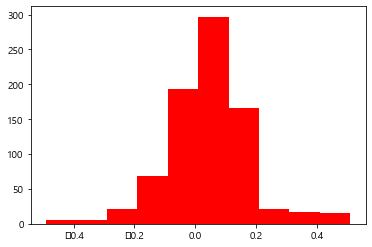

In [36]:
plt.hist(result,color = 'r')

(array([  1.,   0.,   1.,   6.,   8.,  44., 255., 370., 122.,   3.]),
 array([-1.01851852, -0.87684848, -0.73517845, -0.59350842, -0.45183838,
        -0.31016835, -0.16849832, -0.02682828,  0.11484175,  0.25651178,
         0.39818182]),
 <BarContainer object of 10 artists>)

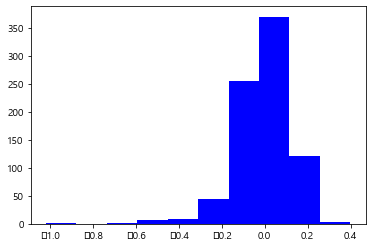

In [37]:
plt.hist(resultRandom,color = 'b')

In [38]:
print(np.mean(result))
print(np.mean(resultRandom))

0.046187099830747286
-0.004345681323103429


In [43]:
result2 = np.array([])
resultRandom2 = np.array([])

for j in range(30):
    b_df = makebdf(a_df,a_df2,j)
    for i in range(len(b_df)):
        if b_df['정규화'][i]<-1.2:
            if i+30<len(b_df):
                result2 = np.append(result2,howmuch(b_df,i))
                k = random.randrange(0,len(b_df)-30)
                resultRandom2 = np.append(resultRandom2,howmuch(b_df,k))

<ipython-input-33-64041f830a84>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b_df['총외국인거래량'][i] = b_df['종가'][i]*b_df['외국인거래량'][i]
<ipython-input-33-64041f830a84>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b_df2['총외국인거래량'][i] = b_df2['종가'][i]*b_df2['외국인거래량'][i]


In [44]:
print(len(result2))
print(len(resultRandom2))

949
949


In [45]:
print(np.mean(result2))
print(np.mean(resultRandom2))

-0.010418068777970963
-0.0001991763769583691


In [43]:
#이 경우 한 종목에 대해서는 외국인의 순매수/순매도가 급증했을 때의 횟수와 랜덤 횟수를 같게 하였음
#즉, 만약 위 데이터에서 삼성전자에 대한 외국인 순매매량을 7번 뽑아 계산하였으면 랜덤한 경우에도 삼성전자에 대해 7번 뽑아서 계산함